# Basic Classification

Here is the first lesson on TensorFlow. It is around [basic classification]( https://www.tensorflow.org/tutorials/keras/basic_classification). It is using the Fashion MNIST dataset that comes built into Keras. It has 70k grayscale images and 10 categories. We will use a neural network to classify images of clothing.

**Classification**  
From my ML textbook [Machine Learning by Tom M. Mitchell](https://www.amazon.com/Machine-Learning-Tom-M-Mitchell/dp/0070428077) 'classification' is described as the task to classify exmaples into one of a discrete set of possible categories. We will do that through passing the image into a neural network and returning the expected category.

**Neural Network Settings**  
In this lesson they are going to use a neural network using 3 layers. The first will flatten the image from a 2d array (28x28 pixels) into a 1d array of 784 pixels (28x28). The next 2 layers are 'Dense' Keras layers. The first has 128 nodes (or neurons). The second is a 10 node layer. This last layer with return the probabilites of each of the 10 categories. These probabilities will sum up to 1.

**Keras**  
This lesson uses Keras as the backend to TensorFlow. With the current release of TensorFlow this is almost built into the framework. When I was doing all of my projects they were still different libraries.

In [2]:
#Import Keras
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

**Fashion MNIST Dataset**  
This [dataset](https://github.com/zalandoresearch/fashion-mnist) is built into Keras. The original MNIST dataset is a collect of hand written numbers. It is used for most of the entry level projects. During my [Data and Visual Analytics](https://www.omscs.gatech.edu/cse-6242-data-visual-analytics) class in graduate school used this dataset to teach us R.  
Fashion MNIST has 70,000 grayscale images that are categorized into 10 groups.

Label | Class  
--- | ---
0|T-shirt/top
1|Trouser
2|Pullover
3|Dress
4|Coat
5|Sandal
6|Shirt
7|Sneaker
8|Bag
9|Ankle boot

In [7]:
#Store these in an array for later
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

**Train/Test**  
For this lesson, they break the 70k dataset into 60k for training and 10k for testing. In my opinion, this is a little heavy on the training side as I like a 70/30 breakdown but this will give us better results.  
One note, you can't use all of the data to train and then test on the same data as you will overfit the data. This basically means that you will only train on your data and have a very good error rate but when you finally test against different data that error rate will start to elevate.

In [5]:
#Load the dataset (Doing this in a separate section so we don't need to keep loading it)
fashion_mnist = keras.datasets.fashion_mnist

In [6]:
#Break apart the data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [20]:
#Check the sizes of the datasets
print( "Training Size: %s" % (train_images.shape,) )
print( "Testing Size: %s" % (test_images.shape,) )
print( "Labels: %s" % (len(train_labels)))
print( "Labels: %s" % (len(test_labels)))

Training Size: (60000, 28, 28)
Testing Size: (10000, 28, 28)
Labels: 60000
Labels: 10000


If you look at the 'train_images' you can see there are 60,000 images and they are size 28x28. The test images contain 10,000. The labels also line up with the number of images.

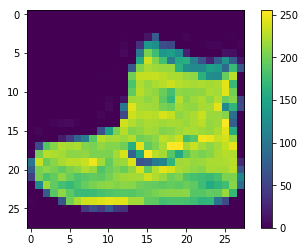

In [24]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

**Image Data**  
If you look at the following graph you can see that the image values are in the range 0 to 255. To preproccess the data we are going to scale these from 0 to 1.

In [25]:
train_images = train_images / 255.0
test_images = test_images / 255.0

**Verify the Processed Data**  
We will display the first 25 images to verify we are going to work with the data we expect.  
One thing to note here in case it wasn't obvious, the image at index i matches up with the label at index i in train_labels.

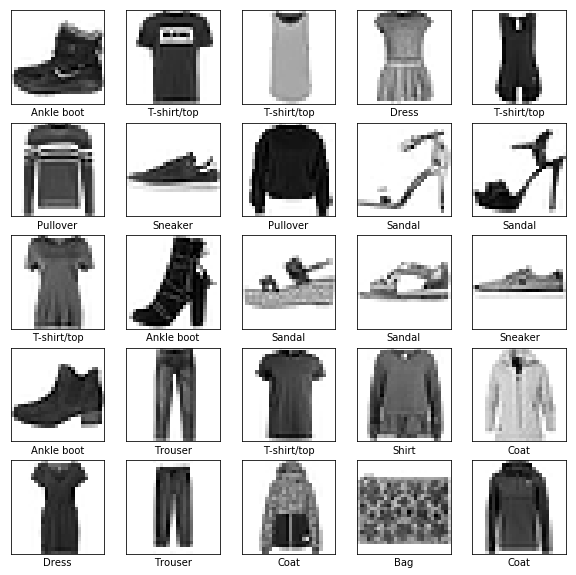

In [28]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

**Building the Model**  
As I listed above we are going to have 3 layers in our neural network, Flatten and 2 Dense layers. The first Dense layer uses an activation of Relu and the second uses Softmax. Check out both of them in the Keras [documentation](https://keras.io/activations/)

In [29]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

**Compile the Model**  
Once the model has been built we need to compile it. For this lesson we will set the loss function, the optimizer and the metrics.  
*Loss Function*: The is how the accuracy is measured during training. This function gets minimized.  
*Optimizer*: This is how the model is updated based on the data and the loss function.  
*Metrics*: Used to monitor the training and testing steps. This code uses the accuracy of the classification. This will get return on the evaluation.

In [30]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

**Train the Model**  
To train the neural network we have to follow a few steps. First, we need to feed in the data to the model (images and labels). Second, the model will learn to associate the image with its label). Third, we will then ask the model to predict the label while passing in the testing images. Finally, we compare what the neural network *thinks* the label is with what it actually is.  
A quick tangent. When we pass in an image we are really passing numbers to the neural network. The neural network will then pass those numbers through the layers of the network and then spit out its guess. When the network gets the actual label it uses back propagation to update each neuron in the network to give us a better result. We continue this process through all of our training data until we have an acceptable result.

In [31]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.5053 - acc: 0.8234
Epoch 2/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.3776 - acc: 0.8643
Epoch 3/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.3387 - acc: 0.8767
Epoch 4/5
60000/60000 [==============================] - 2s 37us/step - loss: 0.3158 - acc: 0.8839
Epoch 5/5
60000/60000 [==============================] - 2s 37us/step - loss: 0.2966 - acc: 0.8910


If you look at the results you can see the loss function is dropping and your accuracy is going up. That is what you want.  
Now, we will compare our training accuracy with our testing accuracy using the 'evaluate' method.

In [32]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test Accuracy:',test_acc)

10000/10000 [==============================] - 0s 29us/step
Test Accuracy: 0.8703


**Making Predictions**  
Once we have the model trained to our acceptable level we can then try and predict what an image will be.

In [33]:
predictions = model.predict(test_images)

In [34]:
predictions[0]

array([4.3894515e-06, 1.4596409e-09, 6.5514155e-07, 3.6225355e-08,
       2.9612511e-07, 5.7866736e-03, 1.0972120e-06, 1.1016537e-02,
       2.4087089e-05, 9.8316622e-01], dtype=float32)

This prediction is what is returned from the 10 neurons in the final dense layer. They represent the probability of each of the 9 categories matching the image. You can see that 9 is the highest number and that ties in with

In [39]:
print('Max Probability Index:',np.argmax(predictions[0]))
print('Predicted Label:',class_names[ np.argmax(predictions[0])])
print('Actual Label:',test_labels[0])

Max Probability Index: 9
Predicted Label: Ankle boot
Actual Label: 9


**Graphing Results**  
We can then graph this to look at the probabilities. We show the correct category in blue. If there is an incorrect label we put that in red. The label on the image is the format of 'Predicted Label Predicted % (Correct Label)'

In [40]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

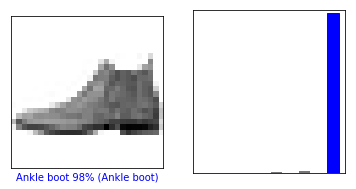

In [41]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

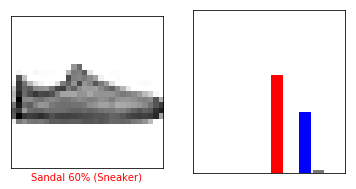

In [44]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

This first image is pretty clearly a boot with 98% accuracy. The 12th image has a little more confusion with only 60% showing it is a sandal but it is really a sneaker.

Here are a few more images graphed.

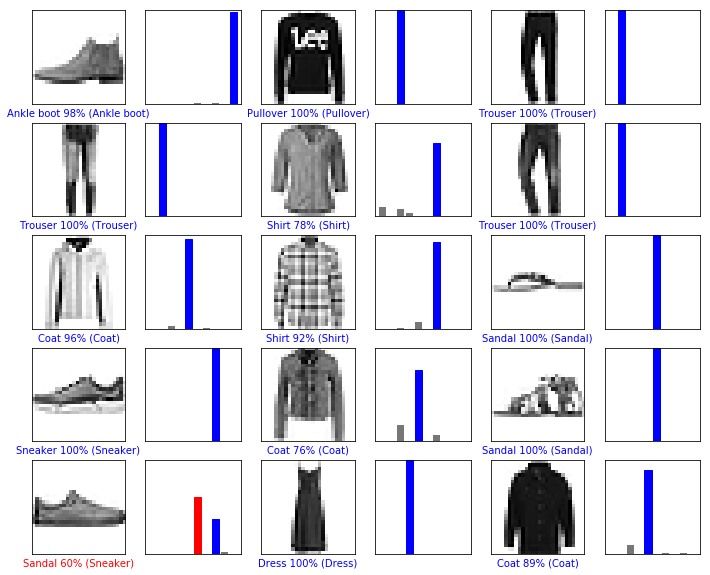

In [47]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

**Copyright**  
Since I closely followed this from the TensorFlow page I will add the copyright.

 @title MIT License

 Copyright (c) 2017 François Chollet

 Permission is hereby granted, free of charge, to any person obtaining a
 copy of this software and associated documentation files (the "Software"),
 to deal in the Software without restriction, including without limitation
 the rights to use, copy, modify, merge, publish, distribute, sublicense,
 and/or sell copies of the Software, and to permit persons to whom the
 Software is furnished to do so, subject to the following conditions:

 The above copyright notice and this permission notice shall be included in
 all copies or substantial portions of the Software.

 THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
 THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
 FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
 DEALINGS IN THE SOFTWARE.